In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Set Notebook preferences
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.style.use("ggplot")


In [24]:
#Read-in raw-data
path= "../Data/adultCensusIncome.csv"

raw_df= pd.read_csv(path)

In [25]:
#Preview Data
print("Data shape: ", raw_df.shape)
raw_df.head()

Data shape:  (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


**Clean Data**

In [26]:
#Replace ?'s with NaN
os.chdir("../EDA/")
from DataCleaningScripts.DataCleaning import find_missing_values

clean_df= find_missing_values(raw_df)

**About the Data**

In [27]:
#View data-types
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [28]:
#View distributions of continous variables
clean_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000,32561.000,32561.000,32561.000,32561.000,32561.000
mean,38.582,189778.367,10.081,1077.649,87.304,40.437
std,13.640,105549.978,2.573,7385.292,402.960,12.347
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117827.000,9.000,0.000,0.000,40.000
50%,37.000,178356.000,10.000,0.000,0.000,40.000
75%,48.000,237051.000,12.000,0.000,0.000,45.000
max,90.000,1484705.000,16.000,99999.000,4356.000,99.000


## EDA

Target Counts

<AxesSubplot:xlabel='income', ylabel='count'>

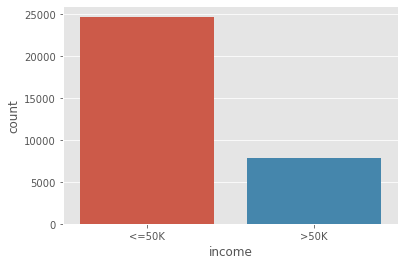

In [29]:
sns.countplot(x=clean_df['income'])

Heat Map

<AxesSubplot:>

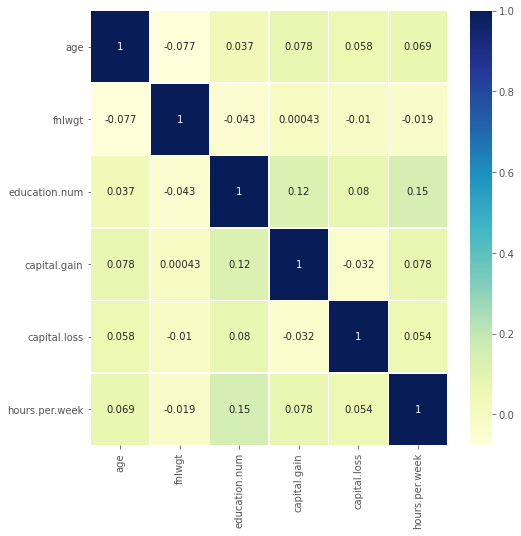

In [30]:
f, ax= plt.subplots(figsize= (8,8))

corr= clean_df.corr()
sns.heatmap(corr,  cmap="YlGnBu", ax=ax,
            annot= True, linewidths= .3);

In [37]:
clean_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Are Education and Education Num encoding the same information?

In [55]:
#Create data frame that holds sorted count values for education and education.num
education_counts= pd.DataFrame()

education_counts['Education']= clean_df.education.value_counts().values
education_counts['EducationNum']= clean_df['education.num'].value_counts().values

education_counts

,Education,EducationNum
0,10501,10501
1,7291,7291
2,5355,5355
3,1723,1723
4,1382,1382
5,1175,1175
6,1067,1067
7,933,933
8,646,646
9,576,576


Income by relationship status

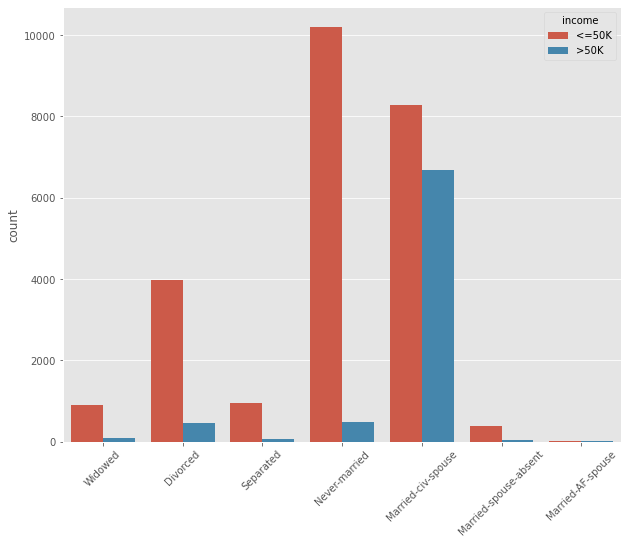

In [67]:
f, ax= plt.subplots(figsize= (10,8))

sns.countplot(x= clean_df['marital.status'], hue=clean_df['income'], ax=ax)
ax.set_xlabel('')
plt.xticks(rotation=45);
